In [2]:
# import modules
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize #special package in pandas
import json
import re
import csv
import sys

## <font color = "red"> Converting from JSON to CSV </font>

Since the data was huge, it would take every fucntion that we ran on the dataframe hours to run. So, through research we found that converting a json file to csv would optimize the running time.

In [6]:
#Converting JSON to csv

data=pd.read_json('reviews_phones.json',lines=True)
data.to_csv(r'C:\Users\Kalpita Raut\Documents\MIM\Spring 2019\741\Project brainstorm\PhonesData.csv',encoding='utf-8')

In [7]:
df = pd.read_csv("PhonesData.csv")
df.head()


,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,120401325X,"[0, 0]",4,They look good and stick good! I just don't li...,"05 21, 2014",A30TL5EWN6DFXT,christina,Looks Good,1400630400
1,1,120401325X,"[0, 0]",5,These stickers work like the review says they ...,"01 14, 2014",ASY55RVNIL0UD,emily l.,Really great product.,1389657600
2,2,120401325X,"[0, 0]",5,These are awesome and make my phone look so st...,"06 26, 2014",A2TMXE2AFO7ONB,Erica,LOVE LOVE LOVE,1403740800
3,3,120401325X,"[4, 4]",4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600
4,4,120401325X,"[2, 3]",5,"awesome! stays on, and looks great. can be use...","02 3, 2013",ATX7CZYFXI1KW,patrice m rogoza,leopard home button sticker for iphone 4s,1359849600


In [8]:
#Checking number of observations
df.shape[0]

194439

## <font color = "red" >Data Cleaning & Preparation </font>

### 1. Removing NA values

In [9]:
#Removing observations with NA values
df=df.dropna(axis=0, how='any')

### 2. The helpful attribute was a string, for future operations we had to first convert it into list

In [10]:
#Slicing the brackets from helpful colummn
df['helpful'] = df.helpful.str.slice(1,-1)
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,120401325X,"0, 0",4,They look good and stick good! I just don't li...,"05 21, 2014",A30TL5EWN6DFXT,christina,Looks Good,1400630400
1,1,120401325X,"0, 0",5,These stickers work like the review says they ...,"01 14, 2014",ASY55RVNIL0UD,emily l.,Really great product.,1389657600
2,2,120401325X,"0, 0",5,These are awesome and make my phone look so st...,"06 26, 2014",A2TMXE2AFO7ONB,Erica,LOVE LOVE LOVE,1403740800
3,3,120401325X,"4, 4",4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600
4,4,120401325X,"2, 3",5,"awesome! stays on, and looks great. can be use...","02 3, 2013",ATX7CZYFXI1KW,patrice m rogoza,leopard home button sticker for iphone 4s,1359849600


In [11]:
#Splitting the values based on ,
df['new'] = df['helpful'].str.split(',')
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,new
0,0,120401325X,"0, 0",4,They look good and stick good! I just don't li...,"05 21, 2014",A30TL5EWN6DFXT,christina,Looks Good,1400630400,"[0, 0]"
1,1,120401325X,"0, 0",5,These stickers work like the review says they ...,"01 14, 2014",ASY55RVNIL0UD,emily l.,Really great product.,1389657600,"[0, 0]"
2,2,120401325X,"0, 0",5,These are awesome and make my phone look so st...,"06 26, 2014",A2TMXE2AFO7ONB,Erica,LOVE LOVE LOVE,1403740800,"[0, 0]"
3,3,120401325X,"4, 4",4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600,"[4, 4]"
4,4,120401325X,"2, 3",5,"awesome! stays on, and looks great. can be use...","02 3, 2013",ATX7CZYFXI1KW,patrice m rogoza,leopard home button sticker for iphone 4s,1359849600,"[2, 3]"


In [12]:
df.shape[0]

190814

In [13]:
#Creating a copy of dataframe
df2 = df
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,new
0,0,120401325X,"0, 0",4,They look good and stick good! I just don't li...,"05 21, 2014",A30TL5EWN6DFXT,christina,Looks Good,1400630400,"[0, 0]"
1,1,120401325X,"0, 0",5,These stickers work like the review says they ...,"01 14, 2014",ASY55RVNIL0UD,emily l.,Really great product.,1389657600,"[0, 0]"
2,2,120401325X,"0, 0",5,These are awesome and make my phone look so st...,"06 26, 2014",A2TMXE2AFO7ONB,Erica,LOVE LOVE LOVE,1403740800,"[0, 0]"
3,3,120401325X,"4, 4",4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600,"[4, 4]"
4,4,120401325X,"2, 3",5,"awesome! stays on, and looks great. can be use...","02 3, 2013",ATX7CZYFXI1KW,patrice m rogoza,leopard home button sticker for iphone 4s,1359849600,"[2, 3]"


### Computing upvotes and downvotes

new_0 = upvotes <br>
new_1 = donwvotes

In [14]:
# expand df.tags into its own dataframe
new = df['new'].apply(pd.Series)

# rename each variable is tags
new = new.rename(columns = lambda x : 'new_' + str(x))

# view the tags dataframe
new

,new_0,new_1
0,0,0
1,0,0
2,0,0
3,4,4
4,2,3
5,1,2
6,0,0
7,1,2
8,2,3
9,1,1


In [15]:
new['new_0'] = pd.to_numeric(new['new_0'])
new['new_1'] = pd.to_numeric(new['new_1'])
type(new['new_0'][0])

numpy.int64

In [16]:
# join the tags dataframe back to the original dataframe
df = pd.concat([df[:], new[:]], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190814 entries, 0 to 194438
Data columns (total 13 columns):
Unnamed: 0        190814 non-null int64
asin              190814 non-null object
helpful           190814 non-null object
overall           190814 non-null int64
reviewText        190814 non-null object
reviewTime        190814 non-null object
reviewerID        190814 non-null object
reviewerName      190814 non-null object
summary           190814 non-null object
unixReviewTime    190814 non-null int64
new               190814 non-null object
new_0             190814 non-null int64
new_1             190814 non-null int64
dtypes: int64(5), object(8)
memory usage: 20.4+ MB


### Further data preparation

The 'helpful' attribute consisted of entries that had values like [0,0]. Meaning, there were no upvotes or downvotes. These entries weren't useful for our study. Thus, we decided to removie such entires.
The code below keeps entries in a new dataframe where the sum of upvotes and downvotes are greater than 5 i.e <br>
upvotes + downvotes > 5 <br>


In [18]:
df2 = df[df['new_0'] + df['new_1'] > 5]

In [41]:
df2['helpful_percent']=df2['new_0']*100/(df2['new_0']+df2['new_1'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
df2.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,new,new_0,new_1,helpful_percent
3,3,120401325X,"4, 4",4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600,"[4, 4]",4,4,50.000000
12,12,3998899561,"3, 3",5,Performs exactly as advertised . It's very st...,"12 5, 2013",A6Q0P54QSP11J,Olivia ysiak,Absolutely love the case !!,1386201600,"[3, 3]",3,3,50.000000
13,13,3998899561,"12, 16",5,"Unlike Most of the Rechargeable Battery cases,...","09 27, 2013",ANMATY0L0HX6Y,Sasha Malkin,Best Rechargeable Battery Case on the Market!!...,1380240000,"[12, 16]",12,16,42.857143
27,27,6073894996,"3, 4",4,This is a nice charger but you can tell it was...,"03 20, 2013",A29OXVQRZ154KX,Don Powell,Solid Charger but RF noisy,1363737600,"[3, 4]",3,4,42.857143
54,54,7532385086,"3, 3",5,I love this case! It's so pretty.And I love th...,"02 2, 2011",A2G38P52ZF5TTH,Allana,I recommend,1296604800,"[3, 3]",3,3,50.000000


In [20]:
df2.shape[0]

14973

In [44]:
df=df2
df.shape[0]

14973

### Computing other semantic features

In [45]:
#Number of words in reviews
df['review_word_count'] = df['reviewText'].apply(lambda x: len(str(x).split(" ")))
df[['reviewText','review_word_count']].head()



,reviewText,review_word_count
3,Item arrived in great time and was in perfect ...,51
12,Performs exactly as advertised . It's very st...,48
13,"Unlike Most of the Rechargeable Battery cases,...",240
27,This is a nice charger but you can tell it was...,85
54,I love this case! It's so pretty.And I love th...,23


In [46]:
#Number of words in summary
df['summary_word_count'] = df['summary'].apply(lambda x: len(str(x).split(" ")))
df[['summary','summary_word_count']].head()


,summary,summary_word_count
3,Cute!,1
12,Absolutely love the case !!,5
13,Best Rechargeable Battery Case on the Market!!...,8
27,Solid Charger but RF noisy,5
54,I recommend,2


In [47]:
#Number of sentences
df['sentences_count']=df['reviewText'].str.count('.')
df[['reviewText','sentences_count']].head()

,reviewText,sentences_count
3,Item arrived in great time and was in perfect ...,275
12,Performs exactly as advertised . It's very st...,257
13,"Unlike Most of the Rechargeable Battery cases,...",1255
27,This is a nice charger but you can tell it was...,400
54,I love this case! It's so pretty.And I love th...,114


In [48]:
#Number of characters
df['char_count'] = df['reviewText'].str.len() ## this also includes spaces
df[['reviewText','char_count']].head()


,reviewText,char_count
3,Item arrived in great time and was in perfect ...,275
12,Performs exactly as advertised . It's very st...,257
13,"Unlike Most of the Rechargeable Battery cases,...",1255
27,This is a nice charger but you can tell it was...,400
54,I love this case! It's so pretty.And I love th...,114


In [49]:
#Computing reviewer expertise
df_rcount = df.groupby(['reviewerID']).size().reset_index(name='reviewer_count')
df_rcount.head()

df_final= pd.merge(df, df_rcount, on="reviewerID")
df_final.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,new,new_0,new_1,helpful_percent,review_word_count,summary_word_count,sentences_count,char_count,reviewer_count
0,3,120401325X,"4, 4",4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600,"[4, 4]",4,4,50.000000,51,1,275,275,1
1,12,3998899561,"3, 3",5,Performs exactly as advertised . It's very st...,"12 5, 2013",A6Q0P54QSP11J,Olivia ysiak,Absolutely love the case !!,1386201600,"[3, 3]",3,3,50.000000,48,5,257,257,1
2,13,3998899561,"12, 16",5,"Unlike Most of the Rechargeable Battery cases,...","09 27, 2013",ANMATY0L0HX6Y,Sasha Malkin,Best Rechargeable Battery Case on the Market!!...,1380240000,"[12, 16]",12,16,42.857143,240,8,1255,1255,1
3,27,6073894996,"3, 4",4,This is a nice charger but you can tell it was...,"03 20, 2013",A29OXVQRZ154KX,Don Powell,Solid Charger but RF noisy,1363737600,"[3, 4]",3,4,42.857143,85,5,400,400,1
4,54,7532385086,"3, 3",5,I love this case! It's so pretty.And I love th...,"02 2, 2011",A2G38P52ZF5TTH,Allana,I recommend,1296604800,"[3, 3]",3,3,50.000000,23,2,114,114,1


## <font color ="red"> Data Pre-processing </font>

- Stopword removal & Unwanted characters removal 
- Tokenizing
- Lemmatizing


In [50]:
# remove unwanted characters, numbers and symbols
df_final['reviewText'] = df_final['reviewText'].str.replace("[^a-zA-Z#]", " ")


In [51]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [52]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df_final['reviewText'] = df_final['reviewText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df_final['reviewText']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

In [53]:
import spacy

nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.extend([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [54]:
#tokenize the reviews and then lemmatize the tokenized reviews

tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['performs', 'exactly', 'advertised', 'sturdily', 'built', 'provides', 'lots', 'boost', 'exactly', 'supposed', 'easy', 'insert', 'phone', 'definitely', 'star', 'experience', 'know', 'would', 'without', 'case', 'love', 'love', 'love']


In [55]:
#print lemmatized review
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1])

great


In [56]:
#common word removal
freq = pd.Series(' '.join(df_final['reviewText']).split()).value_counts()[:10]
freq

freq = list(freq.index)
df_final['reviewText'] = df_final['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_final['reviewText'].head()


0    Item arrived great time perfect condition Howe...
1    Performs exactly advertised very sturdily buil...
2    Unlike Most Rechargeable Battery cases PowerBe...
3    This nice charger tell made cheaply China When...
4    love pretty love feels touch because rubber Ve...
Name: reviewText, dtype: object

In [57]:
#Rare word removal
freq = pd.Series(' '.join(df_final['reviewText']).split()).value_counts()[:10]
freq
freq = list(freq.index)
df_final['reviewText'] = df_final['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_final['reviewText'].head()


0    Item arrived great time perfect condition Howe...
1    Performs exactly advertised sturdily built pro...
2    Unlike Most Rechargeable Battery cases PowerBe...
3    nice charger tell made cheaply China When char...
4    love pretty love feels touch because rubber Ve...
Name: reviewText, dtype: object

## <font color="red"> Visualizing top 50 words </font>

In [58]:
#Print top 50 words
import nltk
from nltk.tokenize import word_tokenize
frequency_dist = nltk.FreqDist(reviews_2)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]



['phone',
 'case',
 'good',
 'battery',
 'screen',
 'device',
 'iphone',
 'time',
 'great',
 'charge',
 'charger',
 'product',
 'button',
 'headset',
 'quality',
 'power',
 'thing',
 'work',
 'bluetooth',
 'cable',
 'review',
 'little',
 'easy',
 'nice',
 'protector',
 'problem',
 'sound',
 'price',
 'camera',
 'small',
 'speaker',
 'call',
 'hour',
 'port',
 'android',
 'galaxy',
 'light',
 'music',
 'issue',
 'life',
 'first',
 'unit',
 'many',
 'feature',
 'volume',
 'much',
 'side',
 'headphone',
 'app',
 'note']

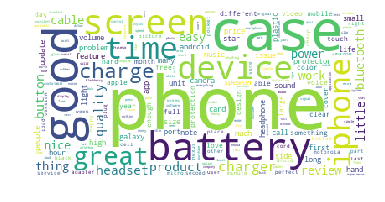

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color='white').generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()